# U.S. Population Migration Data:
### Strengths and Limitations

#### <center><b><U> Census Bureau Processing </U> </b></center>

   The first step in creating the migration data file is to assign a geographic code (geocode) to the IMF data.  The Census assigns these geocodes based on “ZIP plus 4” codes and State of residence reported on the tax return.  The “plus 4” codes actually consist of a pair of two-character codes—a sector code and a segment code.  According to U.S. Post Office guidelines, each sector code identifies a single county.  Using the combination of ZIP sector codes and State of residence codes for each individual return, Census assigns each record a State/county geocode.  To prepare the migration data, which examine year-to-year changes, Census must geocode 2 consecutive filing years of IMF data.  County equivalent codes are assigned to the District of Columbia, the Virgin Islands, Puerto Rico, APO/FPO (military), and “other foreign” areas.
	
#### <center><b><U> Identifying Migrants </U> </b></center>

   Once the geographic codes are assigned, Census determines who in the file has, or has not, migrated.  To do this; 
  -  first, coded returns for the current filing year are matched to coded returns filed during the prior year. 
   
  - The mailing addresses on the two returns are then compared to one another focusing on:  (1) the street address and (2) State plus ZIP code. 
   
  - <b>If the two are identical, the return is labeled a <font color='red'>“non-migrant.”</font></b>
  
  -If any of the above information changed between the 2 years, the return is considered a mover.  However, <b>the return is only classified a <font color='red'>“migrant” </font> if the taxpayer’s geographic code also changed from one year to the next.</b>
  
  - For cases in which the <b> geographic code did change from one year to the next</b>, a taxpayer is considered an <b><font color='red'>“in-migrant” </font></b> for the address on the return filed in the current filing year, and an <font color='red'><b> “out-migrant” </b></font> for the address on the return filed for the prior year.  

#### <center><b><U> Limitations and Margin of Error in dataset:</U> </b></center>

   Although the filer’s return address determines the migration status of the record, there are instances for which the taxpayer may not have changed residences but the return address suggests a move.  This may happen if:  
   1.  the filing address is that of a financial institution or tax preparer, and not that of the actual taxpayer; 
   2.  the taxpayer is a college student living away from home who filed with a home address one year and the college address another; 
   3.  the taxpayer reports his or her place of business as the return address; 
   4.  the taxpayer maintains dual residences, primarily residing in one county but filing the tax return from the other; or 
   5.  the taxpayer uses a post office box for mailing purposes.

As mentioned, those who are not required to file United States Federal income tax returns are not included in this file, and so <b>the data under-represent the poor and the elderly</b>.  Also excluded is the small percentage of tax returns filed after late September of the filing year.  Most taxpayers whose returns are filed after this date have been granted an extension to file by the IRS.  These taxpayers are likely to have complex returns that report relatively high income, and so the migration data set may under-represent the very wealthy, as well.

   The matching process also causes some returns to be excluded from the counts.  <b>When the current-year tax return is compared to the prior-year tax return, only the Social Security Number of the primary taxpayer is considered.</b>  If a secondary filer exists (as in the case of a married couple filing jointly), that Social Security Number is not recorded or compared in creating the migration dataset.  If, for example, a husband and wife file a joint return in the prior year, but divorce and file separately in the current year, only the husband’s current-year return will have a match with the prior-year return.  The now ex-wife’s current-year return becomes a non-match and will not be included in the data counts.  Other changes in filing status—from from joint to married filing separately—will also affect the data.



# Links to preceeding notebooks and dataset 


Notebook:
[ETL Pipeline for Migarion Data, Notebook](https://colab.research.google.com/drive/1mVsEgKZ1UHhnOrEtuRMxCH_r2OqD981L?usp=sharing)

XLS:

  - [Migrants Inflow Trend by Tax Returns, (1993-2020)](https://drive.google.com/file/d/1-MEo7EOXbAmy6qPH4gg6SVvxzqxDUuJR/view?usp=share_link)

  - [Migrants Inflow Trend, (2012-2020)](https://docs.google.com/spreadsheets/d/1om_F3PLc4Bm0P__cQe-tMwluD_ANSHHRrSGcyNf2zzA/edit?usp=sharing)

Raw Folder:
[Migration Raw data files](https://drive.google.com/drive/folders/18yvDHWkru90jEiQKwhqyaAsekex9P7C2?usp=sharing)

Cleaned and Prepped Folder: [Migration Cleaned Data](https://drive.google.com/drive/folders/1QTHi7S5Ph5n-OLe8fa-8cWMA3afl3Wrw?usp=share_link)


# Features 

*   <b>In-migrant_returns: </b> No of Returns Filed from a different location in Current Year compared to the previous Year. (Household Migration Count)

* <b> Out-Migrant_returns: </b> No of Returns for year 1 whose address change in Year 2. 

*   <b>Non-migrant_returns: </b> No of Non-Migrant Returns , where return was filed from the same address in both years. (Household Non-Migration Count)
*   <b> Inmigrants: </b> No. of Individuals filing tax from a different location in Current Year compared to the previous Year. 
*   <b> Nonmigrants: </b> No. of Individuals filing tax from same locations in both years. 

* <b> %Outflow = </b> $ 100*\frac{OUT-migrant\ returns}{Non-migrant\ returns}$


*   <b> %Inflow =  </b> $ 100*\frac{IN-migrant\ returns}{Non-migrant\ returns} $ 

  <b>%Inflow</b> represents the approximate ratio of households flown in County A to the total number of households residing there. Therefore, the feature might help assess a county's load on Infrastructure/Demand.

* <b> %Flow = %Inflow - %Outflow </b> 
    - Positive value would represent Influx into the County 
    - Negative Value would represent Outflux from the County



In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import json
from urllib.request import urlopen
import glob as glob

In [8]:
migration = pd.read_csv('/Users/gigisung/ca_git_index/Research/migration/data/processed/migration_cleaned.csv')
migration = migration[~(migration['County Code'].isin([57005]))].reset_index(drop=True)

# Loading prepped Data For Analysis

In [ ]:
#@title Loading Inflow
inflow_all = pd.read_csv('/content/gdrive/MyDrive/Data/Research Data/07Research/Research Papers/Hypothesis developed from research papers/migration_cleaned_prepped/inflow_all_final.csv')
inflow_all[inflow_all.destination_countyfips==10001]

In [ ]:
#@title Loading Outflow

outflow_all = pd.read_csv('/content/gdrive/MyDrive/Data/Research Data/07Research/Research Papers/Hypothesis developed from research papers/migration_cleaned_prepped/outflow_all.csv')
outflow_all[outflow_all.origin_countyfips==10001]


In [ ]:
countynames = pd.read_csv('/content/gdrive/MyDrive/Data/Helper/county_list_original.csv')
countynames.drop(columns='Year', inplace=True)
countynames.drop_duplicates(inplace=True)
countynames = countynames.reset_index(drop=True)

outflow_all_countynames = outflow_all[['County Code', 'county']].drop_duplicates(subset='County Code').reset_index(drop=True)
outflow_all_countynames = outflow_all_countynames.merge(countynames, on='County Code', how='left')
outflow_all_countynames.loc[(outflow_all_countynames.County.isna()), 'County'] = outflow_all_countynames.loc[(outflow_all_countynames.County.isna()), 'county']
outflow_all_countynames = outflow_all_countynames[['County Code', 'County', 'State']]

In [ ]:
#@title Merge Inflow Outflow , Calculate net Flow

inflow_all.rename(columns={'destination_countyfips':'County Code'}, inplace=True)
outflow_all.rename(columns={'origin_countyfips':'County Code'}, inplace=True)
migration = inflow_all.merge(outflow_all, on=['County Code', 'nonmigrant_returns','Year'], how='outer')
migration.drop(columns=['county_x', 'county_y'], inplace=True)
migration = outflow_all_countynames.merge(migration, on=['County Code'], how='left')
migration = migration[~(migration['County Code'].isin([57001]))].reset_index(drop=True)
migration = migration[['County Code', 'County', 'State', 'Year', 'nonmigrant_returns', 'inmigrant_returns', 'outmigrant_returns', '%inflow', "%outflow"]]
migration['%flow'] = migration['%inflow'] - migration['%outflow'] 
migration = migration[~(migration['County Code']==57007)].reset_index(drop=True)

In [ ]:
migration.to_csv('/content/gdrive/MyDrive/Data/Research Data/07Research/Research Papers/Hypothesis developed from research papers/migration_cleaned_prepped/migration_cleaned.csv', index=False)

# Data Exploration

In [9]:
migration=pd.read_csv('/Users/gigisung/ca_git_index/Research/migration/data/processed/migration_cleaned.csv')

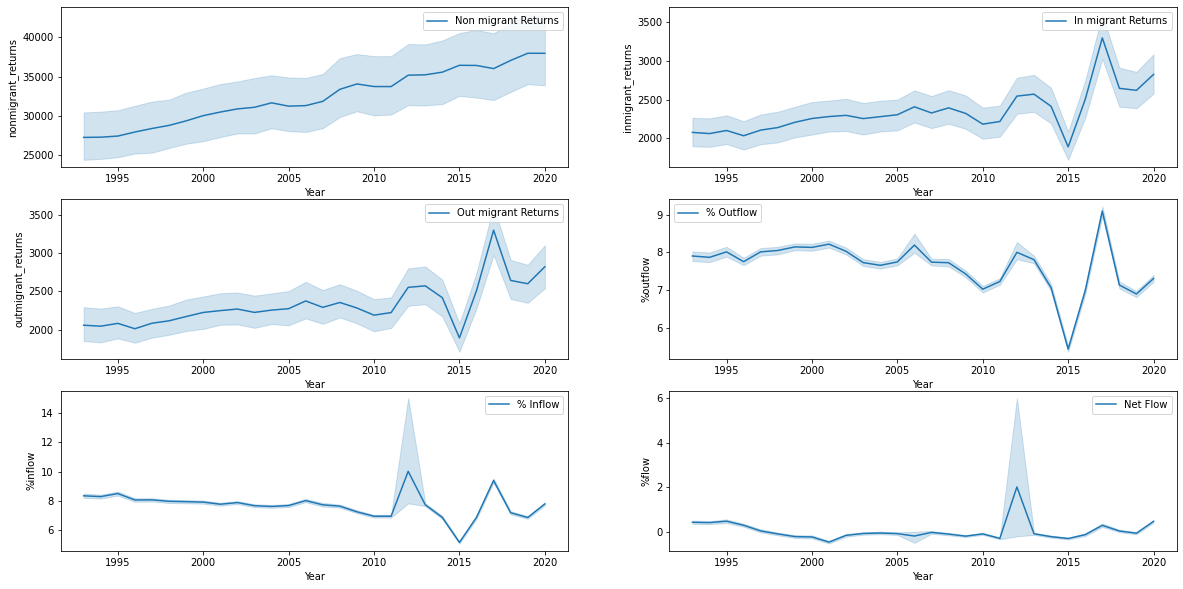

In [ ]:
#@title Time Series Plots
fig, ax = plt.subplots(3, 2, figsize=(20,10))

sns.lineplot(data=migration, x='Year', y='nonmigrant_returns', ax=ax[0][0], label='Non migrant Returns')
sns.lineplot(data=migration, x='Year', y='inmigrant_returns', ax=ax[0][1], label='In migrant Returns')
sns.lineplot(data=migration, x='Year', y='outmigrant_returns', ax=ax[1][0], label='Out migrant Returns')
sns.lineplot(data=migration, x='Year', y='%outflow', ax=ax[1][1], label='% Outflow')
sns.lineplot(data=migration, x='Year', y='%inflow', ax=ax[2][0], label='% Inflow')
sns.lineplot(data=migration, x='Year', y='%flow', ax=ax[2][1], label='Net Flow')
plt.legend()
plt.show()

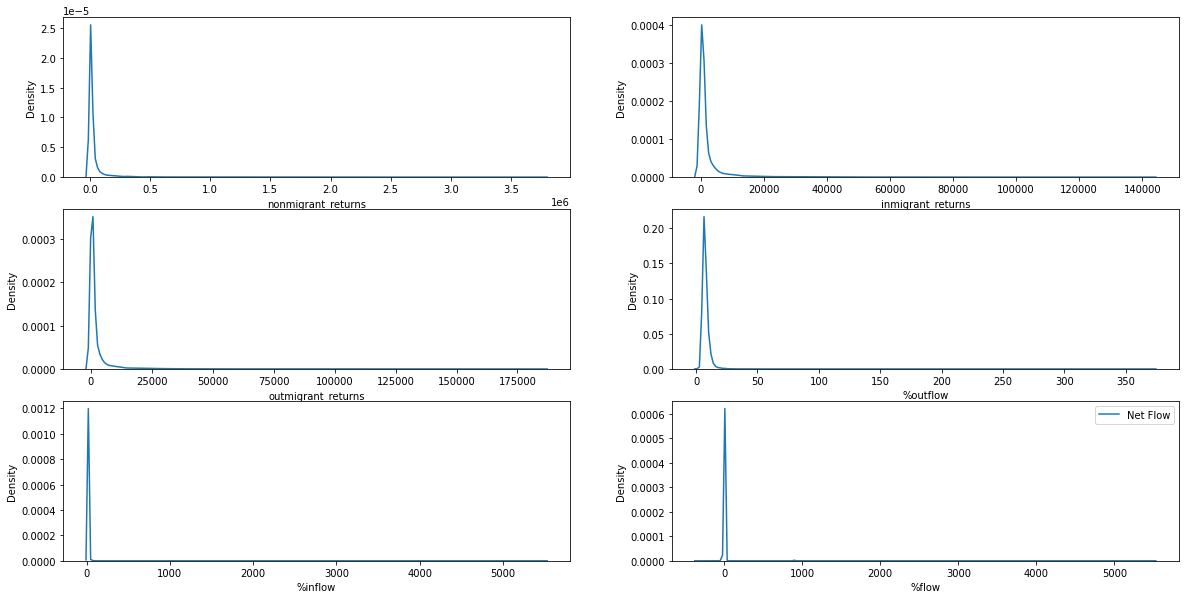

In [ ]:
#@title Density Plots
fig, ax = plt.subplots(3, 2, figsize=(20,10))

sns.kdeplot(data=migration, x='nonmigrant_returns', ax=ax[0][0], label='Non migrant Returns')
sns.kdeplot(data=migration, x='inmigrant_returns', ax=ax[0][1], label='In migrant Returns')
sns.kdeplot(data=migration, x='outmigrant_returns', ax=ax[1][0], label='Out migrant Returns')
sns.kdeplot(data=migration, x='%outflow', ax=ax[1][1], label='% Outflow')
sns.kdeplot(data=migration, x='%inflow', ax=ax[2][0], label='% Inflow')
sns.kdeplot(data=migration, x='%flow', ax=ax[2][1], label='Net Flow')
plt.legend()
plt.show()

In [10]:
migration[migration['County Code']==57007]

,County Code,County,State,Year,nonmigrant_returns,inmigrant_returns,outmigrant_returns,%inflow,%outflow,%flow


In [ ]:
migration.describe()

,County Code,Year,nonmigrant_returns,inmigrant_returns,outmigrant_returns,%inflow,%outflow,%flow
count,87876.000000,87876.000000,8.787400e+04,87830.000000,87852.000000,87829.000000,87852.000000,87806.000000
mean,30404.436592,2006.501161,3.240490e+04,2341.078629,2324.358751,7.707949,7.657128,0.050368
std,15157.778353,8.069587,1.048374e+05,6187.360232,6488.356333,19.214497,3.411059,19.130384
min,1001.000000,1993.000000,1.000000e+00,1.000000,1.000000,0.000000,0.000000,-369.991733
25%,18179.000000,2000.000000,3.470000e+03,243.000000,255.000000,5.583756,6.002499,-0.834427
50%,29177.000000,2006.000000,8.039000e+03,575.000000,581.000000,6.968707,7.153510,-0.139058
75%,45081.000000,2013.000000,2.127600e+04,1612.000000,1573.000000,8.903543,8.626015,0.680439
max,57007.000000,2020.000000,3.768510e+06,142428.000000,185198.000000,5525.000000,373.463764,5525.000000


In [11]:
migration.describe()

,County Code,Year,nonmigrant_returns,inmigrant_returns,outmigrant_returns,%inflow,%outflow,%flow
count,87874.000000,87874.000000,8.787200e+04,87828.000000,87850.000000,87827.000000,87850.000000,87804.000000
mean,30403.831122,2006.501457,3.240551e+04,2341.061415,2324.365270,7.706797,7.656433,0.049910
std,15157.419513,8.069440,1.048385e+05,6187.429606,6488.429996,19.213187,3.407985,19.130339
min,1001.000000,1993.000000,1.000000e+00,1.000000,1.000000,0.000000,0.000000,-369.991733
25%,18179.000000,2000.000000,3.470000e+03,243.000000,255.000000,5.583756,6.002458,-0.834448
50%,29177.000000,2006.000000,8.039000e+03,575.000000,581.000000,6.968678,7.153457,-0.139096
75%,45081.000000,2013.000000,2.127600e+04,1612.000000,1573.000000,8.903286,8.625882,0.680238
max,57005.000000,2020.000000,3.768510e+06,142428.000000,185198.000000,5525.000000,373.463764,5525.000000


# Choropleths

In [4]:
import plotly.express as px
import json
from urllib.request import urlopen

with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
  counties = json.load(response)

In [ ]:
#@title 2020 Migration %Flow

df = migration.copy()
df['County Code'] = df['County Code'].astype('str').str.zfill(5)
df = df[df.Year.isin([2020])].reset_index(drop=True)
fig = px.choropleth(df, locations="County Code",
                        geojson=counties,
                        color="%flow",
                        hover_name="County",
                        scope="usa",
                        range_color=(-8, 8),
                    color_continuous_scale='RdBu_r')
    
fig.update_layout(showlegend=False, title='2020 Migration Flow')
fig.update_traces(marker_line_width=0.25)
fig.show()

In [ ]:
#@title '2012 Migration %Flow'

df = migration.copy()
df['County Code'] = df['County Code'].astype('str').str.zfill(5)
df = df[df.Year.isin([2012])].reset_index(drop=True)
fig = px.choropleth(df, locations="County Code",
                        geojson=counties,
                        color="%flow",
                        hover_name="County",
                        scope="usa",
                        range_color=(-8, 8),
                    color_continuous_scale='RdBu_r')
    
fig.update_layout(showlegend=False, title='2012 Migration Flow')
fig.update_traces(marker_line_width=0.25)
fig.show()

# Choropleth Animations



In [ ]:
#@title % Inflow Yearly Transition
from IPython.display import HTML
from base64 import b64encode
mp4 = open('/Users/gigisung/Library/CloudStorage/GoogleDrive-gigi@climatealpha.ai/Shared drives/Climate Alpha/Research and Data/Internal Migration/migration_cleaned_prepped/percentage_inflow.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=1084 height=600 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
#@title % Outflow  Yearly Transition
from IPython.display import HTML
from base64 import b64encode
mp4 = open('/Users/gigisung/Library/CloudStorage/GoogleDrive-gigi@climatealpha.ai/Shared drives/Climate Alpha/Research and Data/Internal Migration/migration_cleaned_prepped/percentage_outflow.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=1084 height=600 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
#@title % Net Flow Yearly Transition (Blue Outflow, Red Inflow)
from IPython.display import HTML
from base64 import b64encode
mp4 = open('/Users/gigisung/Library/CloudStorage/GoogleDrive-gigi@climatealpha.ai/Shared drives/Climate Alpha/Research and Data/Internal Migration/migration_cleaned_prepped/netflow.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=1084 height=600 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

# Anomalies in Data (Outliers)

- Jewell County Kansas (20089)
- Smith County Kansas (20183)

Both these counties have a <b>drastic increase in <font color='red'>In-migrant </font> population</b> for the year 2012. Similarly a <b>drastic decrease in <font color='red'>Non-Migrant</font></b> population. 

Data shows that disruption for a huge number of people moving into both counties were from Washington County, Kansas. (<font color='red'> CONFIRM THIS FROM OUTFLOW TREND </font>)

Detailed description of the tables is given below: 

In [20]:

inflow_2020 = pd.read_csv('/Users/gigisung/Library/CloudStorage/GoogleDrive-gigi@climatealpha.ai/Shared drives/Climate Alpha/Research and Data/Internal Migration/irs_migration_raw/unzipped_2012_2020/countyinflow1920.csv')

In [21]:
inflow_2012 = pd.read_csv('/Users/gigisung/Library/CloudStorage/GoogleDrive-gigi@climatealpha.ai/Shared drives/Climate Alpha/Research and Data/Internal Migration/irs_migration_raw/unzipped_2012_2020/countyinflow1112.csv', encoding="ISO-8859-1")

In [22]:
inflow_2012[(inflow_2012.y2_statefips==20) & (inflow_2012.y2_countyfips==183)]

,y2_statefips,y2_countyfips,y1_statefips,y1_countyfips,y1_state,y1_countyname,n1,n2,agi
46666,20,183,96,0,KS,Smith County Total Migration-US and Foreign,1532,3150,69082
46667,20,183,97,0,KS,Smith County Total Migration-US,1532,3150,69082
46668,20,183,97,1,KS,Smith County Total Migration-Same State,1496,3063,67093
46669,20,183,97,3,KS,Smith County Total Migration-Different State,36,87,1989
46670,20,183,98,0,KS,Smith County Total Migration-Foreign,-1,-1,-1
46671,20,183,20,201,KS,Washington County,1451,2976,65245
46672,20,183,20,183,KS,Smith County Non-migrants,170,353,7313
46673,20,183,58,0,SS,Other flows - Same State,45,87,1849
46674,20,183,59,0,DS,Other flows - Different State,36,87,1989
46675,20,183,59,3,DS,Other flows - Midwest,12,29,402


In [ ]:
inflow_2012[(inflow_2012.y2_statefips==20) & (inflow_2012.y2_countyfips==89)]

,y2_statefips,y2_countyfips,y1_statefips,y1_countyfips,y1_state,y1_countyname,n1,n2,agi
45408,20,89,96,0,KS,Jewell County Total Migration-US and Foreign,1326,2667,57060
45409,20,89,97,0,KS,Jewell County Total Migration-US,1326,2667,57060
45410,20,89,97,1,KS,Jewell County Total Migration-Same State,1299,2609,55749
45411,20,89,97,3,KS,Jewell County Total Migration-Different State,27,58,1311
45412,20,89,98,0,KS,Jewell County Total Migration-Foreign,-1,-1,-1
45413,20,89,20,201,KS,Washington County,1256,2524,53975
45414,20,89,20,89,KS,Jewell County Non-migrants,24,48,1404
45415,20,89,20,123,KS,Mitchell County,13,24,380
45416,20,89,58,0,SS,Other flows - Same State,30,61,1394
45417,20,89,59,0,DS,Other flows - Different State,27,58,1311


In [23]:
inflow_all[((inflow_all.destination_countyfips==20089))]

type: name 'inflow_all' is not defined

In [ ]:
migration[migration['County Code'].isin([20089])]

,County Code,County,State,Year,nonmigrant_returns,inmigrant_returns,outmigrant_returns,%inflow,%outflow,%flow
8456,20089,Jewell County,Kansas,1993,1502.0,88.0,106.0,5.858855,7.057257,-1.198402
8457,20089,Jewell County,Kansas,1994,1475.0,95.0,96.0,6.440678,6.508475,-0.067797
8458,20089,Jewell County,Kansas,1995,1472.0,84.0,87.0,5.706522,5.910326,-0.203804
8459,20089,Jewell County,Kansas,1996,1470.0,100.0,91.0,6.802721,6.190476,0.612245
8460,20089,Jewell County,Kansas,1997,1486.0,75.0,92.0,5.047106,6.191117,-1.144011
8461,20089,Jewell County,Kansas,1998,1484.0,74.0,104.0,4.986523,7.008086,-2.021563
8462,20089,Jewell County,Kansas,1999,1475.0,82.0,103.0,5.559322,6.983051,-1.423729
8463,20089,Jewell County,Kansas,2000,1453.0,85.0,116.0,5.849966,7.983482,-2.133517
8464,20089,Jewell County,Kansas,2001,1427.0,58.0,112.0,4.064471,7.848633,-3.784163
8465,20089,Jewell County,Kansas,2002,1410.0,64.0,110.0,4.539007,7.801418,-3.262411


#### Identifying and removing outliers using choropleth timeseries visualizations

In [ ]:
inflow_all = inflow_all[~((inflow_all.inmigrant_returns==1) & (inflow_all.nonmigrant_returns==1))].reset_index(drop=True)
# inflow_all = inflow_all[~((inflow_all.destination_countyfips==20089) & (inflow_all.Year==2012))].reset_index(drop=True)

In [ ]:
inflow_2020[inflow_2020.destination_countyfips==20201]

,y2_statefips,y2_countyfips,y1_statefips,y1_countyfips,y1_state,y1_countyname,n1,n2,agi,destination_countyfips
30838,20,201,96,0,KS,Washington County Total Migration-US and Foreign,60,126,2302,20201
30839,20,201,97,0,KS,Washington County Total Migration-US,60,126,2302,20201
30840,20,201,97,1,KS,Washington County Total Migration-Same State,60,126,2302,20201
30841,20,201,20,201,KS,Washington County Non-migrants,2181,4958,123773,20201
30842,20,201,20,117,KS,Marshall County,21,49,810,20201
30843,20,201,58,0,SS,Other flows - Same State,39,77,1492,20201
30844,20,201,59,1,DS,Other flows - Northeast,-1,-1,-1,20201
30845,20,201,59,3,DS,Other flows - Midwest,-1,-1,-1,20201
30846,20,201,59,5,DS,Other flows - South,-1,-1,-1,20201
30847,20,201,59,7,DS,Other flows - West,-1,-1,-1,20201


In [ ]:
inflow_all[inflow_all.destination_countyfips==20201].sort_values(by='Year')

,destination_countyfips,county,inmigrant_returns,nonmigrant_returns,%inflow,Year,County Code
2246,20201,Washington,104.0,2443.0,4.257061,1993,20201
4121,20201,Washington (Total Migrant),130.0,2382.0,5.457599,1994,20201
7254,20201,Washington,120.0,2361.0,5.082592,1995,20201
16644,20201,Washington Coun Tot Mig-US & For,96.0,2440.0,3.934426,1996,20201
13517,20201,Washington Coun Tot Mig-US & For,94.0,2409.0,3.902034,1997,20201
10386,20201,Washington Coun Tot Mig-US & For,81.0,2245.0,3.608018,1998,20201
22901,20201,Washington Coun Tot Mig-US & For,113.0,2178.0,5.188246,1999,20201
19771,20201,Washington Coun Tot Mig-US & For,107.0,2190.0,4.885845,2000,20201
32297,20201,Washington Coun Tot Mig-US & For,110.0,2174.0,5.059798,2001,20201
29166,20201,Washington Coun Tot Mig-US & For,121.0,2308.0,5.242634,2002,20201


# Top performing counties w.r.t Migration

In [ ]:
migration.describe(percentiles=[0.01,0.05,0.25,0.50,0.75,0.95,0.99])

,County Code,Year,nonmigrant_returns,inmigrant_returns,outmigrant_returns,%inflow,%outflow,%flow
count,87871.000000,87871.000000,8.786900e+04,87825.000000,87847.000000,87824.000000,87847.000000,87801.000000
mean,30402.922932,2006.501883,3.240175e+04,2338.523769,2320.754163,7.705224,7.654114,0.050657
std,15156.881282,8.069246,1.048382e+05,6171.525083,6457.157436,19.211626,3.384644,19.130219
min,1001.000000,1993.000000,1.000000e+00,1.000000,1.000000,0.000000,0.000000,-369.991733
1%,1063.000000,1993.000000,3.540000e+02,25.000000,28.000000,3.071870,3.620709,-4.074074
5%,5094.000000,1994.000000,9.910000e+02,65.000000,75.000000,4.093048,4.593113,-2.264291
25%,18179.000000,2000.000000,3.470000e+03,243.000000,255.000000,5.583745,6.002434,-0.834376
50%,29177.000000,2007.000000,8.039000e+03,575.000000,581.000000,6.968637,7.153414,-0.139034
75%,45081.000000,2013.000000,2.127500e+04,1612.000000,1573.000000,8.902776,8.625720,0.680414
95%,53065.000000,2019.000000,1.377436e+05,10446.400000,10167.700000,13.241541,12.185397,2.661095


In [ ]:
migration[migration['%flow'] > 50.0]

,County Code,County,State,Year,nonmigrant_returns,inmigrant_returns,outmigrant_returns,%inflow,%outflow,%flow
3290,22087,St. Bernard Parish,Louisiana,2007,2803.0,2347.0,728.0,83.731716,25.972173,57.759543
8475,20089,Jewell County,Kansas,2012,24.0,1326.0,1.0,5525.000000,0.000000,5525.000000
9007,20029,Cloud County,Kansas,2012,593.0,3061.0,54.0,516.188870,9.106239,507.082631
9790,20183,Smith County,Kansas,2012,170.0,1532.0,1.0,901.176471,0.000000,901.176471
39155,13125,Glascock County,Georgia,1995,742.0,476.0,50.0,64.150943,6.738544,57.412399


#### Removing Jwwell County, Kansas for now, as an outlier, to study the distribution for other counties

In [24]:
migration_1 = migration[~(migration['County Code'].isin([20089]))].reset_index(drop=True)
migration_1.describe(percentiles=[0.01,0.05,0.25,0.50,0.75,0.95,0.99])

,County Code,Year,nonmigrant_returns,inmigrant_returns,outmigrant_returns,%inflow,%outflow,%flow
count,87846.000000,87846.000000,8.784400e+04,87800.000000,87822.000000,87799.000000,87822.000000,87776.000000
mean,30407.118867,2006.501457,3.241543e+04,2341.773292,2325.081790,7.644872,7.657055,-0.012653
std,15158.716073,8.069437,1.048537e+05,6188.286286,6489.340137,4.748302,3.408189,4.279813
min,1001.000000,1993.000000,1.000000e+00,1.000000,1.000000,0.000000,0.000000,-369.991733
1%,1063.000000,1993.000000,3.544300e+02,25.000000,28.000000,3.072864,3.622349,-4.079044
5%,5093.000000,1994.000000,9.910000e+02,65.000000,75.000000,4.093667,4.593949,-2.264319
25%,18179.000000,2000.000000,3.474000e+03,243.000000,255.000000,5.584557,6.002687,-0.834085
50%,29179.000000,2006.000000,8.042000e+03,576.000000,581.000000,6.969175,7.153870,-0.138920
75%,45081.000000,2013.000000,2.128525e+04,1613.000000,1574.000000,8.904110,8.626937,0.680766
95%,53065.000000,2019.000000,1.379271e+05,10455.350000,10171.950000,13.242124,12.188154,2.661280


### Average Migration Performers of 28 years

In [25]:
migration_avg = migration_1.groupby(['County Code','County', 'State'], as_index=False).mean().drop(columns='Year').reset_index(drop=True)

In [26]:
migration_avg.describe()

,County Code,nonmigrant_returns,inmigrant_returns,outmigrant_returns,%inflow,%outflow,%flow
count,3135.000000,3.135000e+03,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000
mean,30404.667943,3.225921e+04,2329.660834,2312.487719,7.640085,7.653137,-0.013932
std,15161.098177,1.039662e+05,6077.293261,6355.158043,2.887464,2.540950,1.307491
min,1001.000000,1.169231e+01,1.000000,1.000000,0.000000,0.000000,-13.583161
25%,18592.000000,3.440250e+03,245.392857,255.107143,5.732330,6.181630,-0.706826
50%,29181.000000,7.993679e+03,576.750000,587.821429,7.026805,7.155985,-0.197575
75%,45082.000000,2.126614e+04,1620.607143,1580.250000,8.794017,8.454700,0.495471
max,56045.000000,3.179761e+06,106468.928571,137998.714286,43.795638,49.777746,31.404964


In [ ]:
#@title Average Migration (28 Years) %IN-FLOW

df = migration_avg.copy()
df['County Code'] = df['County Code'].astype('str').str.zfill(5)
fig = px.choropleth(df, locations="County Code",
                        geojson=counties,
                        color="%inflow",
                        hover_name="County",
                        scope="usa",
                        # range_color=(0, 20),
                    color_continuous_scale='Blues'
                    )
    
fig.update_layout(showlegend=False, title='Average Migration %InFlow')
fig.update_traces(marker_line_width=0.25)
fig.show()

In [ ]:
#@title Average Migration (28 Years) %Out-FLOW

df = migration_avg.copy()
df['County Code'] = df['County Code'].astype('str').str.zfill(5)
fig = px.choropleth(df, locations="County Code",
                        geojson=counties,
                        color="%outflow",
                        hover_name="County",
                        scope="usa",
                        range_color=(0, 20),
                    color_continuous_scale='Blues'
                    )
    
fig.update_layout(showlegend=False, title='Average Migration %OutFlow')
fig.update_traces(marker_line_width=0.25)
fig.show()

In [ ]:
#@title Average (28 Years) Migration %Flow

df = migration_avg.copy()
df['County Code'] = df['County Code'].astype('str').str.zfill(5)
fig = px.choropleth(df, locations="County Code",
                        geojson=counties,
                        color="%flow",
                        hover_name="County",
                        scope="usa",
                        range_color=(-8, 8),
                    color_continuous_scale='RdBu_r'
                    )
    
fig.update_layout(showlegend=False, title='Average Migration %Flow')
fig.update_traces(marker_line_width=0.25)
fig.show()

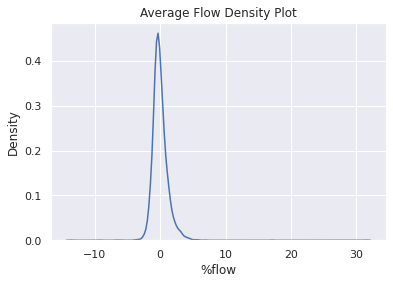

In [ ]:
sns.set()
sns.kdeplot(data=migration_avg, x='%flow')
plt.title('Average Flow Density Plot')
plt.show()

In [ ]:
top_df = migration_avg.sort_values(by='%flow').head(10).reset_index(drop=True)
top_df = top_df.append(migration_avg.sort_values(by='%flow').tail(60).reset_index(drop=True))

#@title Primary Performers Average (28 Years) Migration %Flow

df = top_df.copy()
df['County Code'] = df['County Code'].astype('str').str.zfill(5)
fig = px.choropleth(df, locations="County Code",
                        geojson=counties,
                        color="%flow",
                        hover_name="County",
                        scope="usa",
                        range_color=(-8, 8),
                    color_continuous_scale='RdBu_r'
                    )
    
fig.update_layout(showlegend=False, title='Average Migration %Flow, Top Performers')
fig.update_traces(marker_line_width=0.25)
fig.show()

In [ ]:
migration_avg.sort_values(by='%flow').head(10)

,County Code,County,State,nonmigrant_returns,inmigrant_returns,outmigrant_returns,%inflow,%outflow,%flow
982,20201,Washington County,Kansas,2328.571429,100.285714,417.428571,4.292948,17.876108,-13.583161
1150,22087,St. Bernard Parish,Louisiana,15739.678571,1163.142857,1470.107143,11.207975,20.463665,-9.255690
68,2016,Aleutians West Census Area,Alaska,1447.000000,290.142857,379.214286,20.366443,26.988162,-6.621719
412,13053,Chattahoochee County,Georgia,1571.857143,801.785714,912.214286,43.795638,49.777746,-5.982107
578,16065,Madison County,Idaho,6225.892857,1022.964286,1291.357143,15.902842,19.790877,-3.888035
913,20061,Geary County,Kansas,10771.642857,3175.607143,3575.607143,29.599161,33.300589,-3.701428
71,2060,Bristol Bay Borough,Alaska,366.642857,50.111111,62.392857,12.798023,16.162332,-3.561875
1164,22115,Vernon Parish,Louisiana,14122.785714,2939.892857,3400.857143,21.027571,24.366057,-3.338485
1142,22071,Orleans Parish,Louisiana,120338.678571,11136.571429,13159.892857,10.562510,13.813414,-3.250904
67,2013,Aleutians East Borough,Alaska,568.500000,102.714286,119.642857,18.421893,21.393086,-2.971193


In [ ]:
migration_avg.sort_values(by='%flow').tail(60)

,County Code,County,State,nonmigrant_returns,inmigrant_returns,outmigrant_returns,%inflow,%outflow,%flow
2627,48221,Hood County,Texas,14916.714286,1840.357143,1402.571429,12.567131,9.580473,2.986657
1498,29043,Christian County,Missouri,21773.678571,2917.107143,2335.857143,13.829812,10.829056,3.000756
2666,48299,Llano County,Texas,5252.321429,671.571429,512.892857,12.746776,9.737571,3.009204
464,13157,Jackson County,Georgia,15821.928571,1961.642857,1481.357143,12.383702,9.338325,3.045377
2645,48257,Kaufman County,Texas,28356.857143,3665.642857,2751.500000,12.719294,9.664794,3.054500
328,12017,Citrus County,Florida,44251.071429,4423.571429,3114.071429,10.107037,7.048158,3.058880
264,8039,Elbert County,Colorado,6301.392857,882.750000,727.714286,14.864355,11.797067,3.067287
2706,48379,Rains County,Texas,2820.535714,365.821429,280.178571,13.084744,9.968724,3.116020
533,13297,Walton County,Georgia,20728.821429,2277.250000,1730.357143,11.284993,8.147277,3.137716
636,17093,Kendall County,Illinois,29366.892857,3564.642857,2757.285714,12.533104,9.383127,3.149977


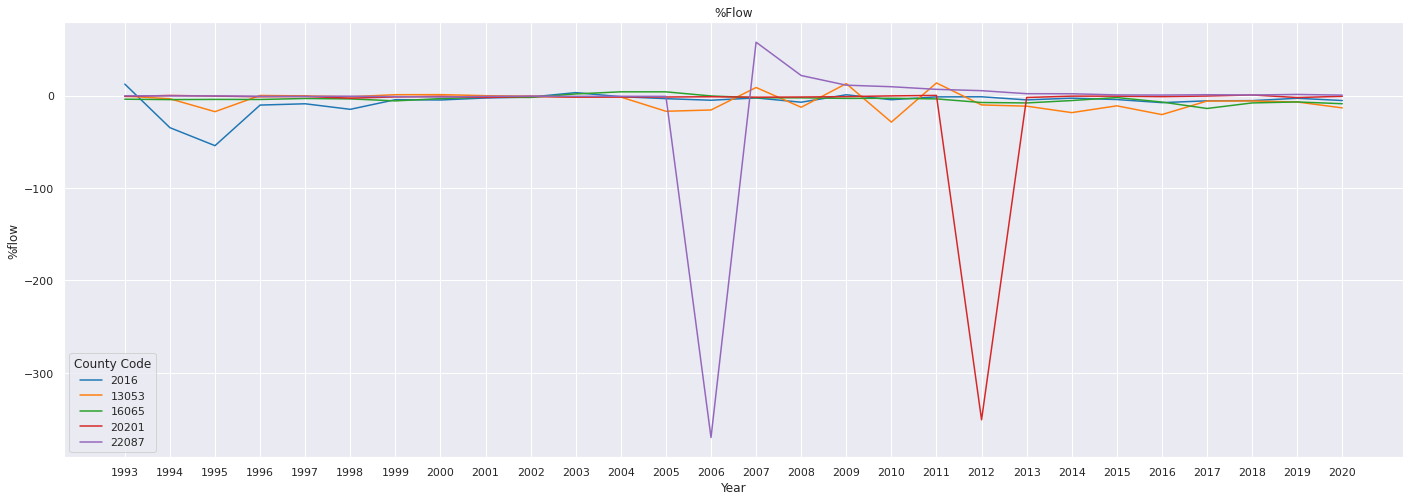

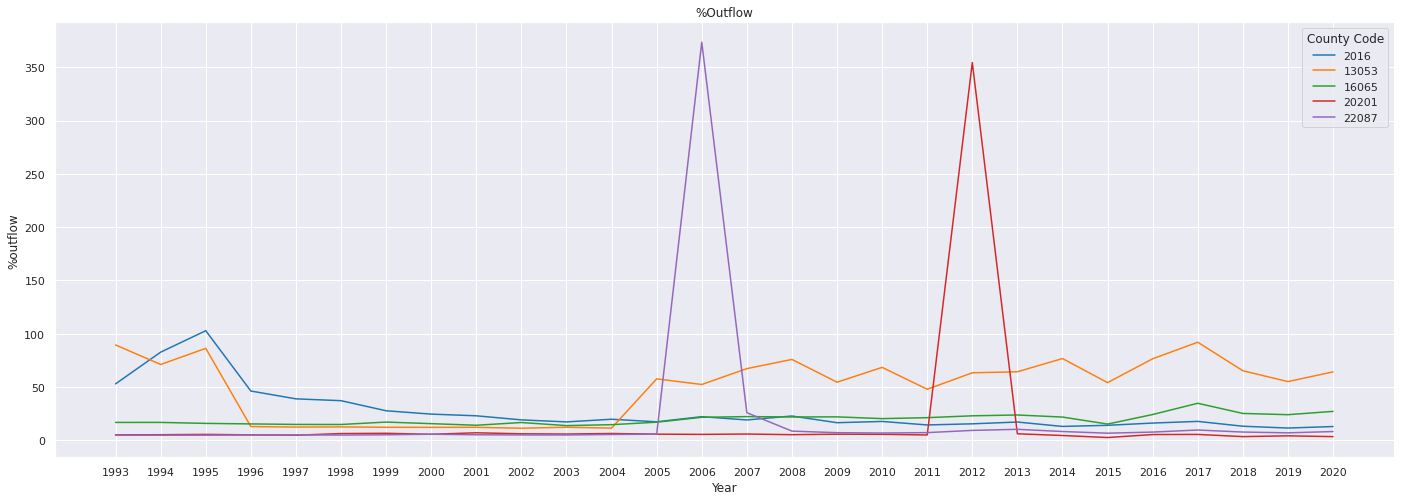

In [ ]:
#@title Top 5 Performers by Outflow

top_5_outflow_fips = [20201, 22087, 2016, 13053, 16065] 

top5outflow_df = migration_1[migration_1['County Code'].isin(top_5_outflow_fips)].reset_index(drop=True)


fig = plt.figure(figsize=(24,8))

g = sns.lineplot(data=top5outflow_df, x='Year', y='%flow', hue='County Code', palette='tab10')
g.set_xticks(range(1993,2021)) # <--- set the ticks first
g.set_xticklabels((migration.Year.unique()))
plt.title('%Flow')
plt.show()

fig = plt.figure(figsize=(24,8))
g = sns.lineplot(data=top5outflow_df, x='Year', y='%outflow', hue='County Code', palette='tab10')
g.set_xticks(range(1993,2021)) # <--- set the ticks first
g.set_xticklabels((migration.Year.unique()))
plt.title('%Outflow')
plt.show()

In [ ]:
top_5_inflow_fips = [20183, 20029, 12119, 13117, 8035]